In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import random
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Input,InputLayer, Activation, BatchNormalization
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D, SpatialDropout2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
import tensorflow as tf
import random
import cv2
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
# import efficientnet.keras as efn
from keras.models import Model
import keras
from keras.callbacks import EarlyStopping
img_size = 224

In [16]:
labels = ['cat', 'dog', 'lion']
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img, (img_size, img_size))
                gray=cv2.cvtColor(resized_arr, cv2.COLOR_BGR2GRAY)
                data.append([gray, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [17]:
train=get_data(r"D:\Universty\level 3\ML\project\Datasets\archive (2)\afhq\train")
# test=get_data("../input/animal-faces/afhq/val")

C:\Users\abdal\AppData\Local\Temp/ipykernel_12856/3600624145.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [18]:
Xt = []
Yt = []#train
# Xv = []
# Yv = []#test

for feature, label in train:
  Xt.append(feature)
  Yt.append(label)

# for feature, label in test:
#   Xv.append(feature)
#   Yv.append(label)

In [19]:
# Normalize the data
Xt = np.array(Xt,dtype=np.float16) / 255
# Xv = np.array(Xt,dtype=np.float16) / 255

In [20]:
print(Xt.shape)
# print(Xv.shape)

(12269, 224, 224)


In [21]:
Xt=Xt.reshape(-1, img_size, img_size, 1)
Yt = np.array(Yt)

# Xv=Xv.reshape(-1, img_size, img_size, 1)
# Yv = np.array(Yv)

In [22]:
model = Sequential()
model.add(InputLayer(input_shape=(img_size, img_size, 1)))

model.add(ZeroPadding2D((3, 3)))
model.add(Conv2D(112, activation='relu', kernel_size=(3, 3)))
model.add(MaxPooling2D((2, 2), strides=(3, 3)))
model.add(Conv2D(72, activation='relu', kernel_size=(2, 2)))
model.add(MaxPooling2D((2, 2), strides=(3, 3)))
model.add(Conv2D(64, activation='relu', kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(32, activation='relu', kernel_size=(2, 2)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(3, 3)))
model.add(Conv2D(16, activation='relu', kernel_size=(2, 2)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 230, 230, 1)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 228, 228, 112)     1120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 76, 76, 112)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 72)        32328     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 72)       0         
 2D)                                                             
                                                        

In [23]:
rms= RMSprop(lr=0.00001)
model.compile(optimizer =rms , loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

C:\Users\abdal\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
Xt,Xv,Yt,Yv = train_test_split(Xt,Yt,train_size = 0.8,test_size = 0.2,random_state =42)

In [28]:
history = model.fit(Xt[:1000,:],Yt[:1000],epochs = 3,validation_data = (Xv[:200,:],Yv[:200]))

Epoch 1/3
32/32 [==============================] - 84s 3s/step - loss: 0.8623 - accuracy: 0.6030 - val_loss: 1.0666 - val_accuracy: 0.4739
Epoch 2/3
32/32 [==============================] - 83s 3s/step - loss: 0.8446 - accuracy: 0.6030 - val_loss: 1.0600 - val_accuracy: 0.5302
Epoch 3/3
32/32 [==============================] - 83s 3s/step - loss: 0.8258 - accuracy: 0.6250 - val_loss: 1.0499 - val_accuracy: 0.5318


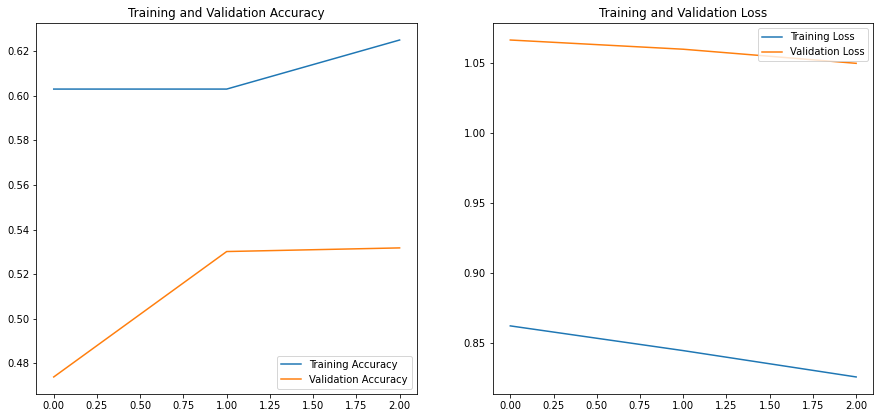

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

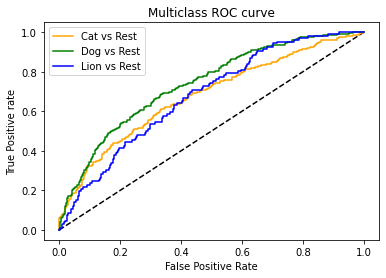

In [45]:
# predictions = model.predict(Xt[:33,:])
# predictions = predictions.reshape(1,-1)[0]
# print(classification_report(Yt[:99], predictions, target_names = ['cat (Class 0)','dog (Class 1)','lion (Class 2)']))

fpr = {}
tpr = {}
thresh ={}

n_class = 3
y_score = model.predict(Xt[:1000,:])
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Yt[:1000], y_score[:,i], pos_label=i)
    
 
plt.plot(np.array([0,1]),linestyle='--',color='black')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Cat vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Dog vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Lion vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

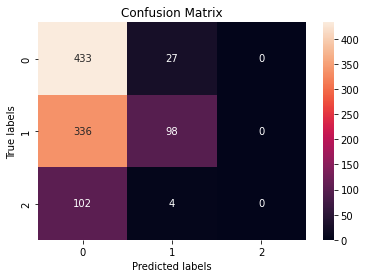

In [66]:
# import sklearn.metrics as metrics
# cm = metrics.confusion_matrix(Yt, y_score)
# print(cm)
predict = list()
for i in y_score:
    predict.append(i.index(max(i)))


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
cm = confusion_matrix(Yt[:1000], predict[:1000] )
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 